<a href="https://colab.research.google.com/github/Sksingh2596/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS


df = pd.read_csv("/content/3) Sentiment dataset.csv")
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

         Timestamp            User     Platform  \
0  1/15/2023 12:30   User123          Twitter     
1   1/15/2023 8:45   CommuterX        Twitter     
2  1/15/2023 15:45   FitnessFan      Instagram    
3  1/15/2023 18:20   AdventureX       Facebook    
4  1/15/2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature

In [3]:
# Creating a function to get sentiment polarity and label
def get_sentiment(text):
  blob = TextBlob(str(text))
  polarity = blob.sentiment.polarity

  if polarity > 0.1:
    label = 'Positive'
  elif polarity < -0.1:
    label = 'Negative'
  else:
    label = 'Neutral'
  return pd.Series([polarity, label])

df[['Polarity', 'Predicted_Sentiment']] = df['Text'].apply(get_sentiment)
print(df[['Text', 'Polarity', 'Predicted_Sentiment']].head(10))

                                                Text  Polarity  \
0   Enjoying a beautiful day at the park!        ...  0.750000   
1   Traffic was terrible this morning.           ... -1.000000   
2   Just finished an amazing workout! 💪          ...  0.750000   
3   Excited about the upcoming weekend getaway!  ...  0.468750   
4   Trying out a new recipe for dinner tonight.  ...  0.136364   
5   Feeling grateful for the little things in lif... -0.187500   
6   Rainy days call for cozy blankets and hot coc...  0.025000   
7   The new movie release is a must-watch!       ...  0.170455   
8   Political discussions heating up on the timel...  0.000000   
9   Missing summer vibes and beach days.         ... -0.200000   

  Predicted_Sentiment  
0            Positive  
1            Negative  
2            Positive  
3            Positive  
4            Positive  
5            Negative  
6             Neutral  
7            Positive  
8             Neutral  
9            Negative  


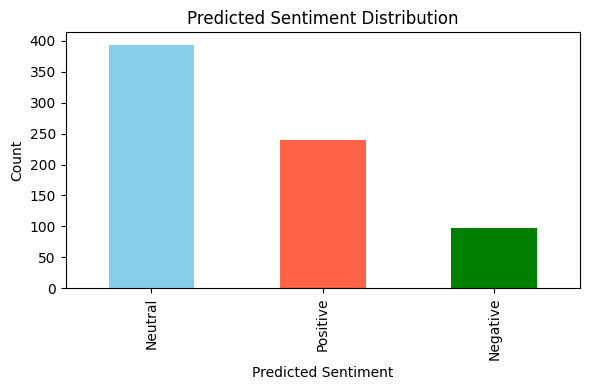

In [4]:
# Visualizing the predicted sentiment distribution.
pred_counts = df ['Predicted_Sentiment'].value_counts()
plt.figure(figsize = (6,4))
pred_counts.plot (kind ='bar', color = ['skyblue', 'tomato', 'green'])
plt.title ('Predicted Sentiment Distribution')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

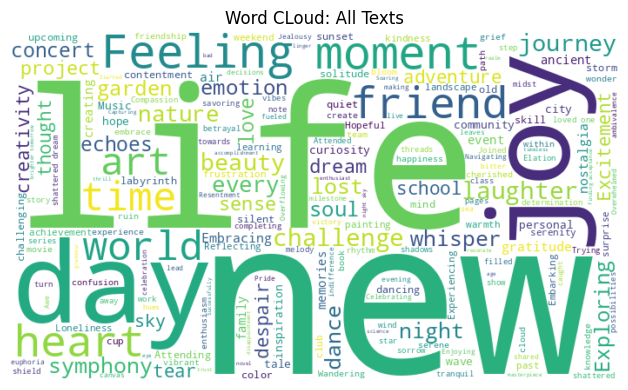

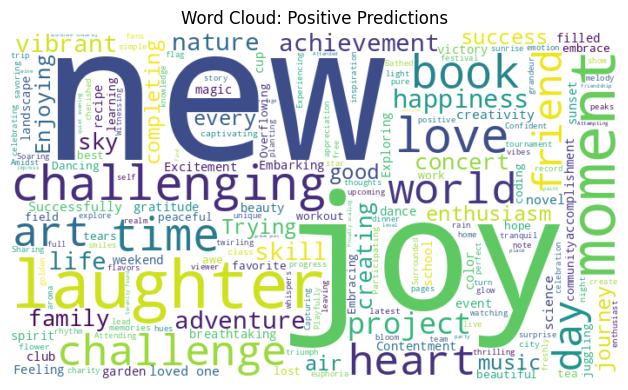

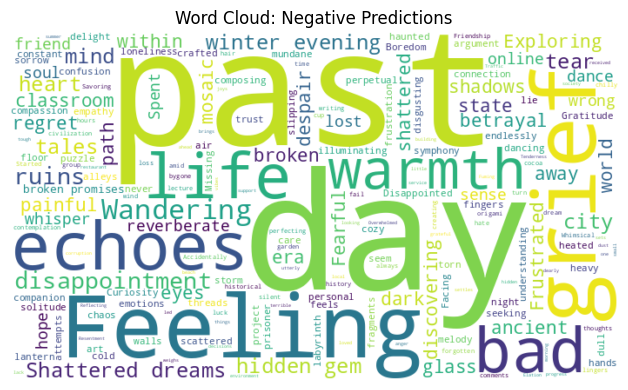

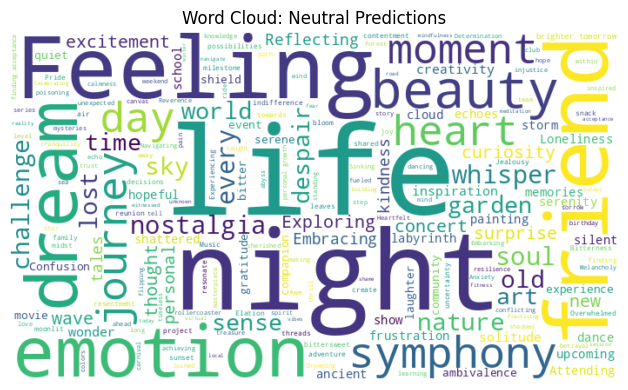

In [5]:
def generate_wordcloud (text, title):
  wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 700, height = 400, colormap = 'viridis').generate(''.join(text.dropna().astype(str)))
  plt.figure(figsize = (7,4))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.title(title)
  plt.tight_layout()
  plt.show()

generate_wordcloud (df['Text'], 'Word CLoud: All Texts')

for sentiment in ['Positive', 'Negative', 'Neutral']:
  texts = df[df['Predicted_Sentiment']== sentiment]['Text']
  if not texts.empty:
    generate_wordcloud(texts, f'Word Cloud: {sentiment} Predictions')

Summary of What This Does :

    Visualizes the most commonly used words in the entire dataset and in each sentiment category.

    Lets us compare how word usage differs between positive, negative, and neutral texts.

    Helps in exploring text data—for example, you might notice “joy” appears mostly in positive texts, or “past” in negative ones.


To Conlcude:

I am using word clouds to get a visual overview of the most frequent words in the whole dataset and in each sentiment class, making it easier to spot patterns and differences in language usage.